<h1><center> Maximum Likelihood Estimation</center></h1>


## Estimation:

In this TP, we are going to put into practice what we learnt about Maximum Likelihood Estimation. We will also illustrate the asymptotic properties of MLE.


In [203]:
import numpy as np
from matplotlib import pyplot as plt
import math

# Exercise: Binomial distribution

Let $Y$ be distributed from a Bernoulli distribution (coin flip) with parameter $p$ with $p \in (0,1)$ and let $X$ be distributed from a binomial distribution $\text{Bin}(n,p)$ with $n\in \mathbb{N}$.


1. Sample one realization $y_1$ of $Y \sim \mathcal{B}(p^\star)$ with $p^\star=0.4$.


In [204]:
p = 0.4
n = 1

In [205]:
y1 = np.random.binomial(1, p)

2. Compute the likelihood function associated with this observed value $y$ (function of the parameter $p$).


$L(y,p)=p^y (1-p)^{1-y}$


In [206]:
def likelihood_binomial(p, n, k):
    return math.comb(n, k) * p**k * (1 - p)**(n - k)

3. Plot the likelihood function (as a function of $p$).


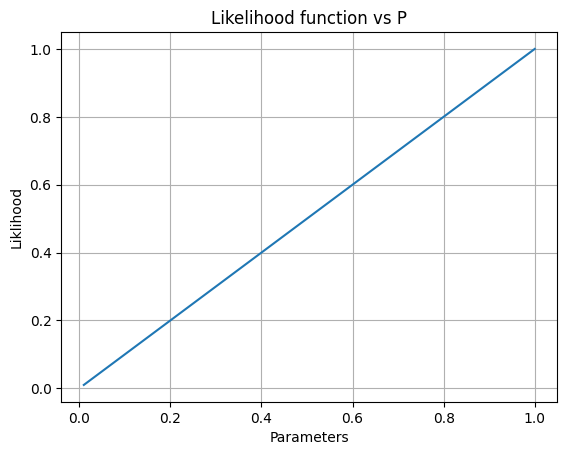

In [207]:
parameters = np.linspace(0.01, 1, 10_000)
plt.plot(parameters, likelihood_binomial(parameters, n, 1))
plt.title("Likelihood function vs P")
plt.xlabel("Parameters")
plt.ylabel("Liklihood")
plt.grid();

4. Sample $4$ other observed values, and plot the associated likelihood functions in the same graph. What are the maximum likelihood estimates in the five cases?


In [208]:
y2 = np.random.binomial(n, 0.4)
y3 = np.random.binomial(n, 0.4)
y4 = np.random.binomial(n, 0.4)
y5 = np.random.binomial(n, 0.4)
y1, y2, y3, y4, y5

(1, 1, 1, 0, 0)

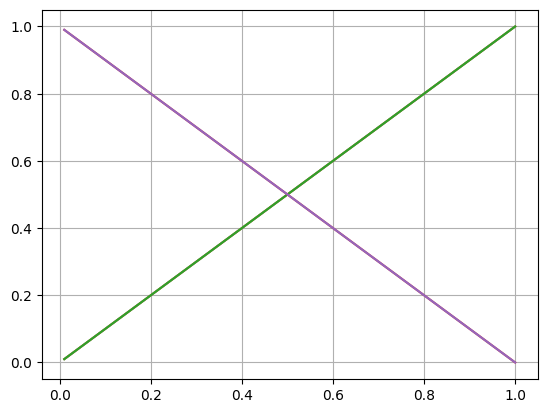

In [209]:
plt.grid()
plt.plot(parameters, likelihood_binomial(parameters, n, y1))
plt.plot(parameters, likelihood_binomial(parameters, n, y2))
plt.plot(parameters, likelihood_binomial(parameters, n, y3))
plt.plot(parameters, likelihood_binomial(parameters, n, y4))
plt.plot(parameters, likelihood_binomial(parameters, n, y5))

5. Sample one realization $x_1$ of $X \sim \text{Bin}(n,p)$ with $p^\star=0.4$ and $n=20$. Plot the likelihood associated to this observed value $x$.


In [210]:
n = 20
y1 = np.random.binomial(n, 0.4)

6. Compute and plot the likelihood function associated to this observation.


$L(y,n,p)= \binom{n}{y} p^y (1-p)^{n-y}$


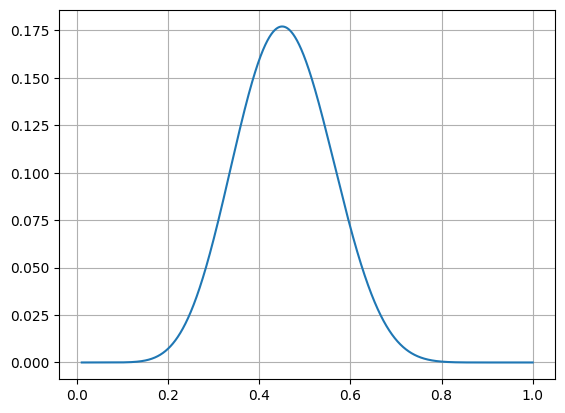

In [211]:
parameters = np.linspace(0.01, 1, 100_000)
plt.grid()
plt.plot(parameters, likelihood_binomial(parameters, n, y1));

In [212]:
list_likelihoods = likelihood_binomial(parameters, n, y1)
parameters[np.argmax(list_likelihoods)]

0.45

7. Plot the likelihood associated to $4$ other observed values in the same graph. What are the maximum likelihood estimates in the five cases?


In [213]:
y2 = np.random.binomial(n, p)
y3 = np.random.binomial(n, p)
y4 = np.random.binomial(n, p)
y5 = np.random.binomial(n, p)

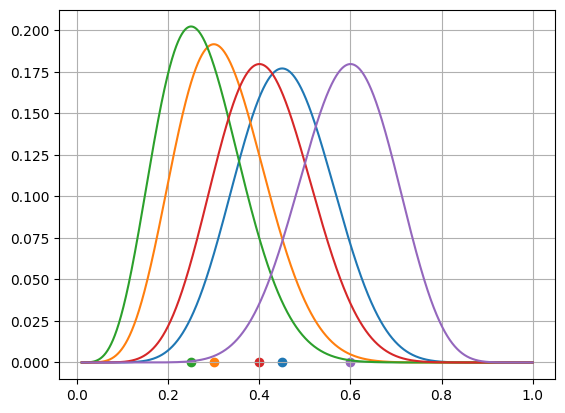

In [214]:
plt.grid()
plt.plot(parameters, likelihood_binomial(parameters, n, y1))
plt.scatter(y1 / n, 0, marker="o")
plt.plot(parameters, likelihood_binomial(parameters, n, y2))
plt.scatter(y2 / n, 0, marker="o")
plt.plot(parameters, likelihood_binomial(parameters, n, y3))
plt.scatter(y3 / n, 0, marker="o")
plt.plot(parameters, likelihood_binomial(parameters, n, y4))
plt.scatter(y4 / n, 0, marker="o")
plt.plot(parameters, likelihood_binomial(parameters, n, y5))
plt.scatter(y5 / n, 0, marker="o")

8. Repeat question 6 for $n\in\{10,20,50\}$. What do you observe ?


9. Recall the asymptotic properties of the MLE studied in the previous class. How can you verify them empirically ?


In [254]:
N = 10000
n = 20
p = 0.4
y = np.random.binomial(n, p, N)
np.mean(y / n * 1.0)

0.39841000000000004

In [255]:
moyenne = []
n_space = [1, 5, 10, 50, 100, 500, 1000, 5000, 10000]
for n in n_space :
    y = np.random.binomial(n, p, N)
    p_MLE = np.mean(y / n * 1.0)
    moyenne.append(p_MLE)

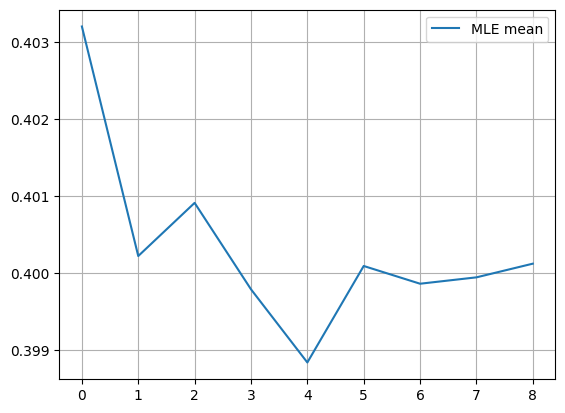

In [256]:
plt.grid()
plt.plot(moyenne, label="MLE mean")
plt.legend();

In [257]:
variance = []
for n in [1, 5, 10, 50, 100, 500, 1000, 5000, 10000]:
    y = np.random.binomial(n, p, N)
    var_MLE = np.var(y / n * 1.0)
    variance.append(var_MLE)

The theoretical value of variance under the Binomial model is given by $p(1-p)/n$


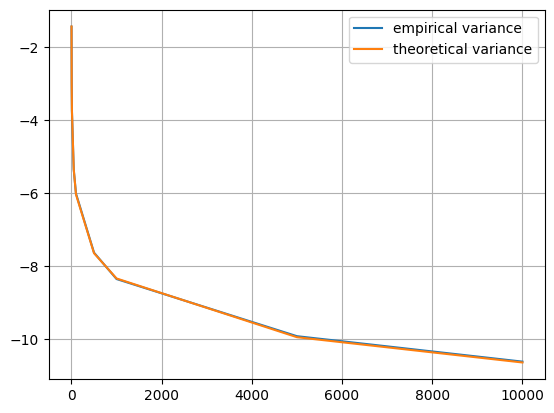

In [258]:
plt.grid()
n = np.array([1, 5, 10, 50, 100, 500, 1000, 5000, 10000])
plt.plot(n, np.log(variance), label="empirical variance")
plt.plot(n, np.log(p * (1 - p) / n), label="theoretical variance")
plt.legend()